In [44]:
import sqlite3
# Create DB and table
conn = sqlite3.connect("Sales_data_db.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert data
sample_data = [
    ("Laptop", 5, 80000.00),
    ("Phone", 10, 50000.00),
    ("Tablet", 7, 30000.00),
    ("Laptop", 3, 90000.00),
    ("Phone", 2, 20000.00),
    ("Tablet", 3, 20000.00),
    ("TV",10, 70000)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()
conn.close()

In [46]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database
conn = sqlite3.connect("sales_data_db.db")

In [48]:
# SQL query to get total quantity sold and revenue per product
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""

In [50]:
# Load into pandas DataFrame
df = pd.read_sql_query(query, conn)

In [52]:
# Close the connection
conn.close()

In [54]:
print("Sales Summary:")
print(df)

Sales Summary:
  product  total_qty   revenue
0  Laptop          8  670000.0
1   Phone         12  540000.0
2      TV         10  700000.0
3  Tablet         10  270000.0


<Figure size 1000x600 with 0 Axes>

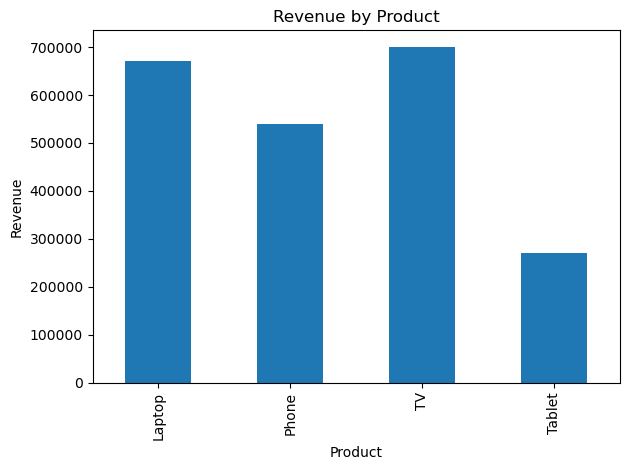

In [56]:
# Plotting a bar chart for revenue by product
plt.figure(figsize=(10, 6))
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")  
plt.show()
